## Experiment 11

### Data Cleaning and Preprocessing with Pandas: Use the Pandas library in Python to clean and preprocess large datasets, addressing issues such as missing values, outliers, and inconsistent data.

### Importing Required Libraries

In [23]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [24]:
# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Initial exploration of the dataset
print("Dataset Head:\n\n", titanic.head())

print("\n\nDataset Info:\n")
titanic.info()

Dataset Head:

    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  ----

### Handle Missing Values

In [26]:
# ===================== Handle Missing Values =====================
# Check missing values
print("\nMissing Values per Column:\n")
print(titanic.isnull().sum())

# Handling missing values for 'age' and 'embarked' columns
# For Age: Fill with the median value
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# For Embarked: Fill with the mode value (most frequent)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Check if missing values are handled
print("\nMissing Values after Imputation:\n")
print(titanic.isnull().sum())



Missing Values per Column:

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing Values after Imputation:

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### Handle Outliers

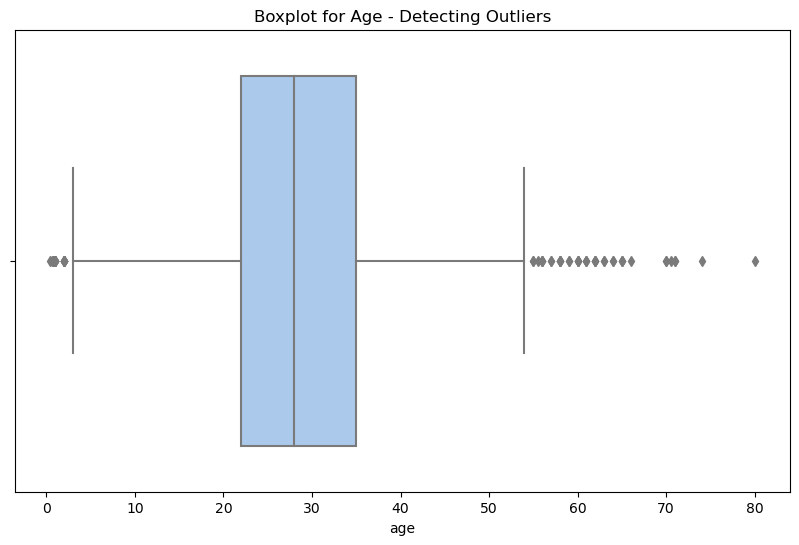

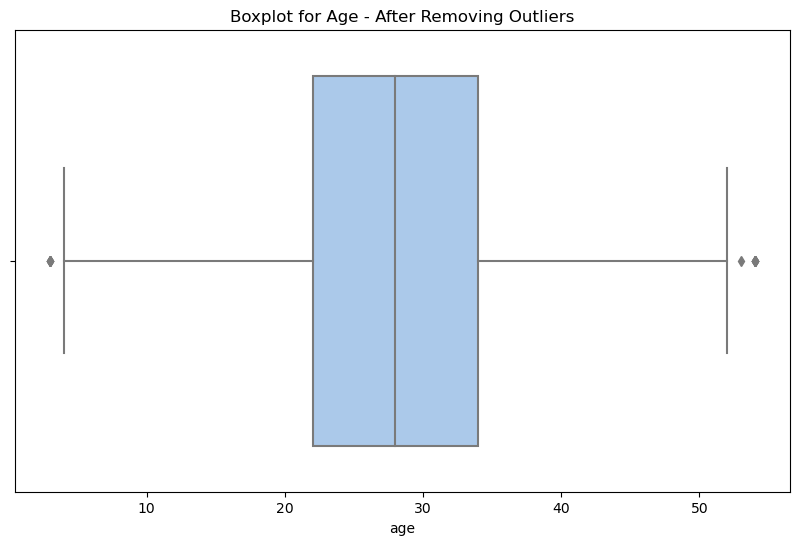

In [27]:
# ===================== Handle Outliers =====================
# Visualize the distribution of 'age' to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=titanic['age'], palette = "pastel")
plt.title("Boxplot for Age - Detecting Outliers")
plt.show()

# Removing outliers in 'age' column using IQR (Interquartile Range)
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1
age_lower = Q1 - 1.5 * IQR
age_upper = Q3 + 1.5 * IQR

# Remove rows where age is outside the IQR range
titanic_clean = titanic[(titanic['age'] >= age_lower) & (titanic['age'] <= age_upper)]

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=titanic_clean['age'], palette = "pastel")
plt.title("Boxplot for Age - After Removing Outliers")
plt.show()

### Handle Inconsistent Data

In [28]:
# ===================== Handle Inconsistent Data =====================
# Visualize the 'sex' column for inconsistent data
print("\nUnique Values in 'sex' Column:")
print(titanic['sex'].unique())

# Normalize the 'sex' column to lowercase for consistency
titanic['sex'] = titanic['sex'].str.lower()

# Check for changes in 'sex' column
print("\nNormalized 'sex' Column:")
print(titanic['sex'].unique())


Unique Values in 'sex' Column:
['male' 'female']

Normalized 'sex' Column:
['male' 'female']


### Feature Engineering

In [31]:
# ===================== Feature Engineering =====================
# Create a new feature 'family_size' by combining 'sibsp' and 'parch'
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

### Statistical Measures

In [30]:
# ===================== Statistical Measures =====================
# Calculate and print basic statistics of the cleaned dataset
print("\nCleaned Dataset Statistics:\n")
print(titanic_clean.describe())


Cleaned Dataset Statistics:

         survived      pclass         age       sibsp       parch        fare
count  825.000000  825.000000  825.000000  825.000000  825.000000  825.000000
mean     0.380606    2.341818   28.515152    0.507879    0.357576   31.483615
std      0.485830    0.824096   10.177256    1.090670    0.798599   49.956429
min      0.000000    1.000000    3.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   13.416700
75%      1.000000    3.000000   34.000000    1.000000    0.000000   30.070800
max      1.000000    3.000000   54.000000    8.000000    6.000000  512.329200


### Visualizing Data Distribution

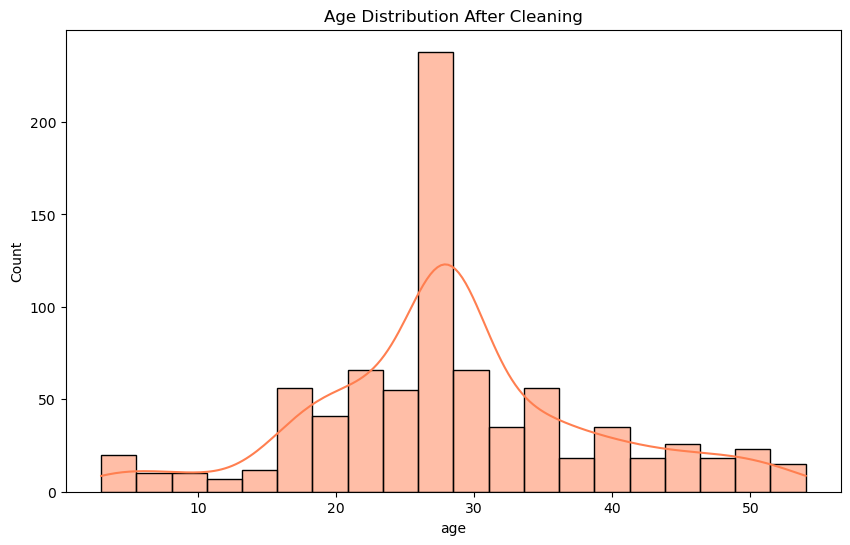

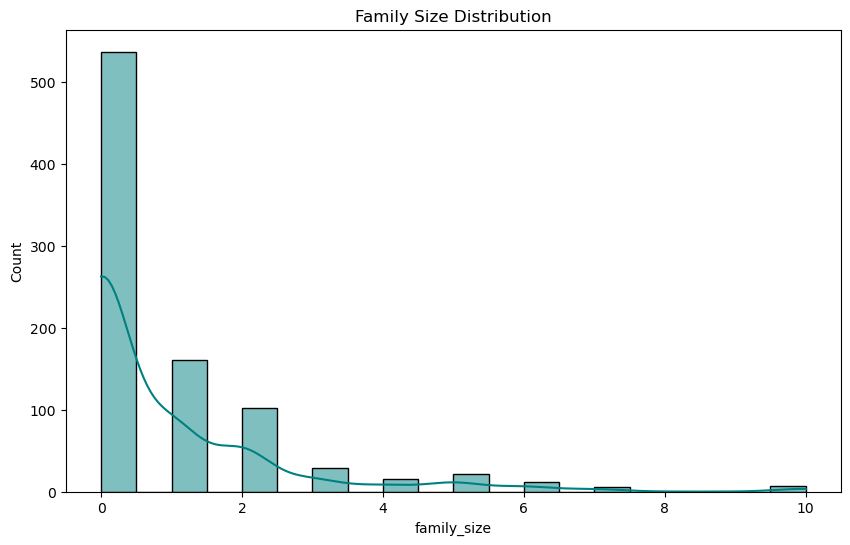

In [32]:
# ===================== Visualizing Data Distribution =====================
# Visualize the distribution of 'age' and 'family_size'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_clean['age'], kde=True, color='coral', bins=20)
plt.title("Age Distribution After Cleaning")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(titanic['family_size'], kde=True, color='teal', bins=20)
plt.title("Family Size Distribution")
plt.show()